# Исследование факторов успешности видеоигр

Интернет-магазин продает по всему миру компьютерные игры. Из открытых источников доступны данные о продажах игр, оценках пользователей и критиков, жанрах и платформ. Необходимо выявить определяющие успешность игры закономерности.  Это позволит учесть потенциально популярный продукт и спланировать рекламные кампании. Перед нами данные до 2016 года.

## Изучение общей информации

Мы будем использовать инструменты для работы с таблицами и визуализацией графиков. Импортируем *pandas, seaborn* и *matplotlib*.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Данные хранятся в таблице формата *.csv*, загрузим их и выведем первые 10 строк.

In [2]:
data = pd.read_csv('D:/Stuffs/project/game_success/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Информация о столбцах:
<ul>
    <li><i>Name</i> - название игры
    <li><i>Platform</i> - платформа
    <li><i>Year_Of_Release</i> - год выпуска
    <li><i>Genre</i> - жанр игры
    <li><i>NA_sales</i> - продажи в Северной Америке (миллионы проданных копий)
    <li><i>EU_sales</i> - продажи в Европе (миллионы проданных копий)
    <li><i>JP_sales</i> - продажи в Японии (миллионы проданных копий)
    <li><i>Other_sales</i> - продажи в других странах (миллионы проданных копий)
    <li><i>Critic_score</i> - оценка критиков (до 100)
    <li><i>User_score</i> - оценка пользователей (до 10)
    <li><i>Rating</i> - рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию
</ul>

В данных явно присутствуют пропуски, а также несоотвествие названий столбцов с привычным стилем. Чтобы посмотреть более подробную информацию, используем `info()`. Это даст нам информацию о типах данных столбцов, и позволит оценить количество пропусков в столбцах.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


* Столбецы *User_score* и *Year_of_Release* представлены в неверном типе данных, первый должен быть в *float*, а второй в *integer*. Возможно в оценках пользователей прячется какая-то строка, которая и меняет тип.
* Значительное количество пропусков содержится в столбцах с оценками и возрастным рейтингом игры. Возможно потому что игра только вышла или наоборот - настолько древняя и малоизвестная, что оценки не успели сформироваться.

Это мы учтем на следующем этапе по предобработке данных.

## Предобработка данных

На этом этапе мы подготавливаем данные для дальнейшего анализа. Как уже мы выяснили, необходимо разорабраться с пропусками, типом данных столбца User_score, и названиями столбцов. Также важно проверить таблицу на наличие дубликатов или символьных ошибок в категориальных столбцах. 

### Обработка названий столбцов

Для более удобной работы в дальнейшем, приведем названия всех столбцов к нижнему регистру.

In [4]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Этим выводом мы также выяснили, что в названиях столбцов отсутствуют пробелы.

### Обработка пропусков

Прежде чем перейти к пропускам в столбцах оценок и возрастного рейтинга, разберемся с остальными единичными пропусками. Если каждый из этих пропусков будет занимать одну строку , то таких строк будет всего около 270, то есть в худшем варианте мы удалим 1.5% строк, что не является значимой частью. Так мы и поступим с ними.

In [5]:
print('Размер таблицы до:', data.shape)
data = data.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)
print('Размер таблицы после:', data.shape)

Размер таблицы до: (16715, 11)
Размер таблицы после: (16444, 11)


Удалено 271 строк.

Пропуски в столбцах оценок и рейтинга очень много, их заполнение приведет к недостоверным результатам при анализе. Поэтому заполнять мы их не будем. Однако на следующем этапе - "Исследовательский анализ" - мы попробуем определиться с причинами наличия пропусков.

Теперь разберемся со столбцом рейтинга ESRB. Этот рейтинг выставляют не всем играм, потому присутствуют пропущенные значения. Мы не сможем определить свой рейтинг каждой игре, поэтому всем пропускам присвоим значение "unknown".

In [6]:
data['rating'] = data['rating'].fillna('unknown')

### Изменение типа данных

Сразу сменим тип данных столбца с годом релиза на целочисленный, нам не нужны дроби.

In [7]:
data['year_of_release'] = data['year_of_release'].astype('int')

В столбце <b>user_score</b> возможно присутствуют строковые значения, найдем их по следующему алгоритму:

In [8]:
object_list = []
for element in data['user_score']:
    try:
        a = float(element)              #если значение не переводится в число, то в список падает это значение
    except:
        object_list.append(element)

pd.Series(object_list).value_counts()

tbd    2376
dtype: int64

Значение *tbd* означает что оценка еще не определена, то же самое можно сказать и обо всех остальных пропусках. На всякий случай убедимся в том, что значение *tbd* описывает также все остальные пропуски в этом столбце.

В любом случае мы не будем удалять строки, а заполнение описательными единицам делать нельзя. Для обработки пропусков, значения tbd и остальные пропуски приравняем к -1, с целью приведения столбца к численному типу данных.

In [9]:
data['user_score'] = data['user_score'].fillna(-1).replace('tbd', -1)

Теперь можно менять тип данных на *float*.

In [10]:
data['user_score'] = data['user_score'].astype('float')

Посмотрим на итог:

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


### Обработка дубликатов

Одной игре может уделиться несколько строк, потому что она поддерживается на нескольких платформах, чтобы отыскать явные дубликаты применим метод `duplicated()` ко всей таблице.

In [12]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют. Неявные дубликаты могут означать грамматические ошибки в написании (например жанр "Racing" и "Rasing"). Чтобы их найти, мы посмотрим на уникальные значения таких столбцов как жанр и рейтинг. 

Ошибки в наименовании игры отыскать будет проблематично, мы это опустим, как и ошибки в написании аббревиатуры платформы.

In [13]:
data['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

In [14]:
data['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

В столбце рейтинга присутствует значение, о котором я не нашел информации (K-A), однако оно все равно присутствует всего в трех строках. Таким же образом можно сказать о некоторых других рейтингах. Они не несут в себе никакой информации.

### Удаление выбросов

Нам стоит удалить настолько редкие строки, чтобы они не увеличивали наши будущие графики в размерах. Удалим редковстречающиеся возрастные рейтинги, и таким же образом посмотрим на столбец *platform*.

In [15]:
data = data.query('rating not in ["EC", "K-A", "AO", "RP"]')
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+'], dtype=object)

Теперь найдем редкие игровые платформы

In [16]:
data['platform'].value_counts()

PS2     2126
DS      2119
PS3     1306
Wii     1284
X360    1232
PSP     1193
PS      1189
PC       952
GBA      811
XB       802
GC       541
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Исключим из анализа все платформы встречающиеся меньше 30 раз.

In [17]:
data = data.query('platform not in ["GEN", "NG", "SCD", "WS", "3DO", "TG16", "GG", "PCFX"]')

### Подсчет суммарных продаж

Так как мы будем анализировать продажи по жанрам, нам пригодится столбец с общей суммой продаж игры по всему миру сразу. Столбец состоит из суммы столбцов с продажами из других ругионов.

In [18]:
data.insert(8, 'total_sales', data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1))
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,-1.0,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,-1.0,unknown


Таблица подготовлена к анализу.

## Исследовательский анализ

### Количество игр по периодам

Так как мы выявляем факторы определяющие успешность игры, нам нужно исследовать лишь те периоды в которых достаточно записей. Выведем гистограмму с количеством игр на каждый год.

<AxesSubplot:title={'center':'Распределение количества релизов на каждый год'}, xlabel='year_of_release', ylabel='count'>

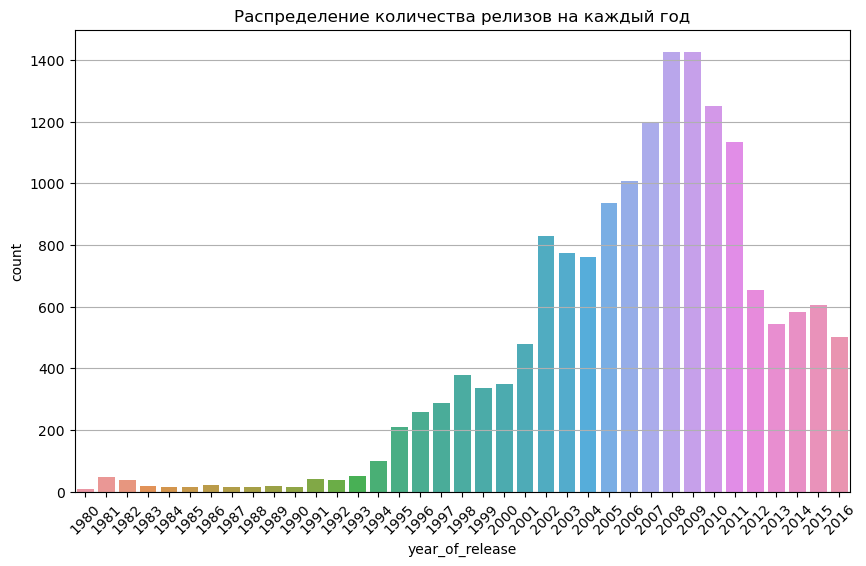

In [19]:
releases_data = (data[['year_of_release', 'name']].
                 groupby('year_of_release').
                 count().
                 reset_index().
                 rename(columns={'name': 'count'}))

plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
plt.grid()
plt.title('Распределение количества релизов на каждый год')
sns.barplot(data = releases_data, x='year_of_release', y='count')



График становится значимым с 1995 - с этого года мы имеем достаточно данных. Остальные данные будут лишь нас путать, поэтому мы их срежем.

In [20]:
data_fltr = data.query('year_of_release >= 1995')

### Ведущие платформы по годам

Возможно найдутся наиболее популярные платформы. Мы создали столбец с общей суммой продаж, им мы сейчас и воспользуемся. Выявлять популярные платформы мы будем по наибольшему соотношению общей суммы продаж по платформе к общей сумме продаж по всем платформам за весь год.

Первым шагом мы создадим сводную таблицу, которая будет хранить общую сумму продаж платформ по каждому году.

In [21]:
platform_sales = (data_fltr[['year_of_release', 'platform', 'total_sales']]
                 .pivot_table(index='year_of_release', 
                              columns='platform',
                              values='total_sales',
                              aggfunc='sum')
                 .fillna(0))
platform_sales

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,...,PS4,PSP,PSV,SAT,SNES,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1995,0.00,0.00,0.00,3.60,0.00,0.00,0.00,4.22,35.96,0.00,...,0.00,0.00,0.00,11.57,32.20,0.00,0.00,0.00,0.00,0.00
1996,0.00,0.00,0.00,36.03,0.00,0.00,34.10,10.58,92.79,0.00,...,0.00,0.00,0.00,7.69,15.92,0.00,0.00,0.00,0.00,0.00
1997,0.00,0.00,0.00,6.37,0.00,0.00,39.50,8.86,136.17,0.00,...,0.00,0.00,0.00,6.77,0.99,0.00,0.00,0.00,0.00,0.00
1998,0.00,3.38,0.00,26.90,0.00,0.00,49.24,3.26,169.49,0.00,...,0.00,0.00,0.00,3.82,0.22,0.00,0.00,0.00,0.00,0.00
1999,0.00,5.16,0.00,38.00,0.00,0.00,57.87,4.74,144.53,0.00,...,0.00,0.00,0.00,0.09,0.26,0.00,0.00,0.00,0.00,0.00
2000,0.00,5.99,0.00,19.76,0.07,0.00,33.97,4.66,96.37,39.17,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.00
2001,0.00,1.07,0.00,9.24,61.53,26.34,3.25,5.47,35.59,166.43,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.26,0.00
2002,0.00,0.29,0.00,0.00,74.16,51.81,0.08,8.57,6.67,205.38,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,48.01,0.00
2003,0.00,0.00,0.00,0.00,56.67,50.61,0.00,8.84,2.07,184.31,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,55.04,0.00


Напишем функцию которая будет считать долю от общих продаж, проходя по каждой строке нашей сводной таблицы.

<AxesSubplot:title={'center':'Доля продаж от общей суммы продаж игр по платформам на каждый год'}, xlabel='platform', ylabel='year_of_release'>

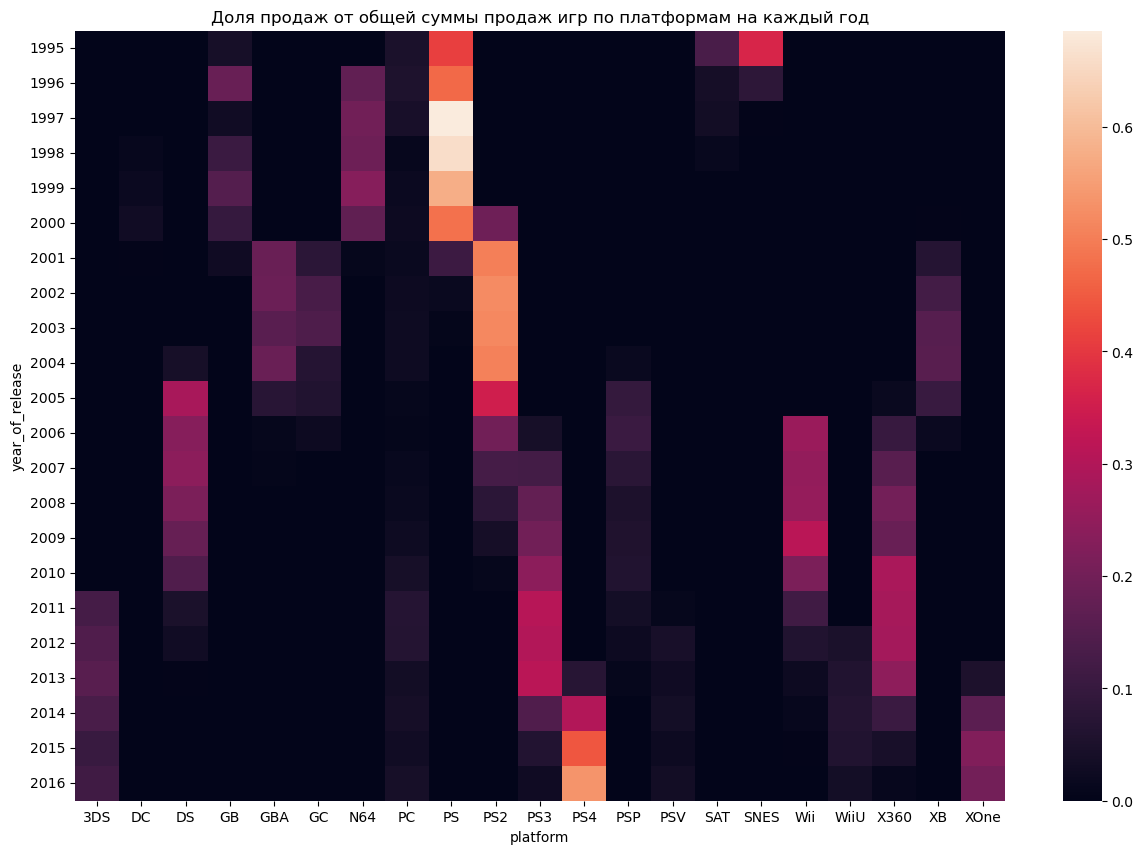

In [22]:
def take_part(data, row_num=0):
    total_list = []
    for index in range(len(data)):
        index += row_num
        total = 0
        for column in data.columns:
            total += data.loc[index, column]
        total_list.append(total)
    
    for index in range(len(data)):
        for column in data.columns:
            data.loc[index + row_num, column] /= total_list[index]
    return data

plt.figure(figsize=(15,10))
plt.title("Доля продаж от общей суммы продаж игр по платформам на каждый год")
sns.heatmap(take_part(platform_sales, 1995))

Нельзя не заметить, Playstation всегда была в лидерах. В период 2006-2009 она стала конкурировать с Nintendo DS и Wii. А с 2009 года - с XBox.

Также мы можем видеть, что примерно каждые 6 лет появляются новые платформы, которые почти сразу затмевают старые. Это ярко прослеживается по <b>Nintendo</b>, <b>Playstation</b> и <b>XBox</b>. Это три самые <b>потенциально прибыльные</b> платформы.

Это в свою очередь означает, что для прогноза следует брать данные с 2014 года. По этим данным можно составить прогноз на 2017, 2018 и 2019 года, так как за 6 лет появляются новые платформы. Это будет наш <b>актуальный период</b>.

In [23]:
data_actual = data.query('year_of_release > 2013 and total_sales > 0')
data_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,-1.0,unknown
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,M
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,11.68,NaN,-1.0,unknown
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.58,82.0,4.3,E
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,7.98,NaN,-1.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
16432,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,-1.0,unknown
16436,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.01,NaN,-1.0,unknown
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,NaN,-1.0,unknown
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,-1.0,unknown


### Глобальные продажи игр по платформам

Сперва покажем количество продаж по каждой платформе, тем самым отрезав уже неактуальные платформы.

<AxesSubplot:title={'center':'Количество продаж по каждой платформе'}, xlabel='platform', ylabel='name'>

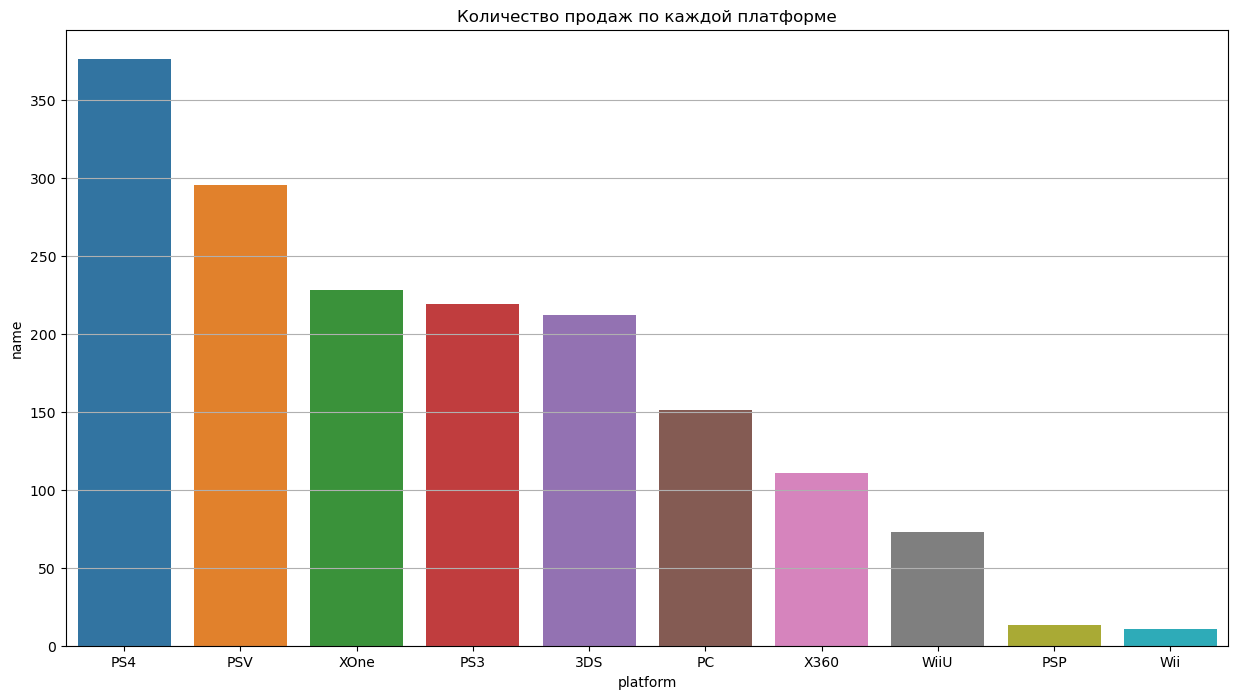

In [24]:
plt.figure(figsize=(15,8))
plt.title('Количество продаж по каждой платформе')
plt.grid(True)
sns.barplot(data=(data_actual.groupby('platform')
                  .count().reset_index().
                  sort_values(by='name', ascending=False)),
            y='name', x='platform')

Такие платформы как PSP и Wii нам больше неинтересны. Вырежем их из актуальной актуального периода. 

In [25]:
data_actual = data_actual.query('platform not in ["PSP", "Wii"]')

Построим график "ящик с усами" по глобальным продажам игр в разбивке по платформам, для того чтобы оценить на какую сумму в среднем удается продать игру по каждой из самых прибыльных платформ. Отличается от прошлого графика лишь тем что мы разделяем по году, так как актуальный период уже выбран.

<AxesSubplot:title={'center':'Сумма продаж игр по платформам'}, ylabel='platform'>

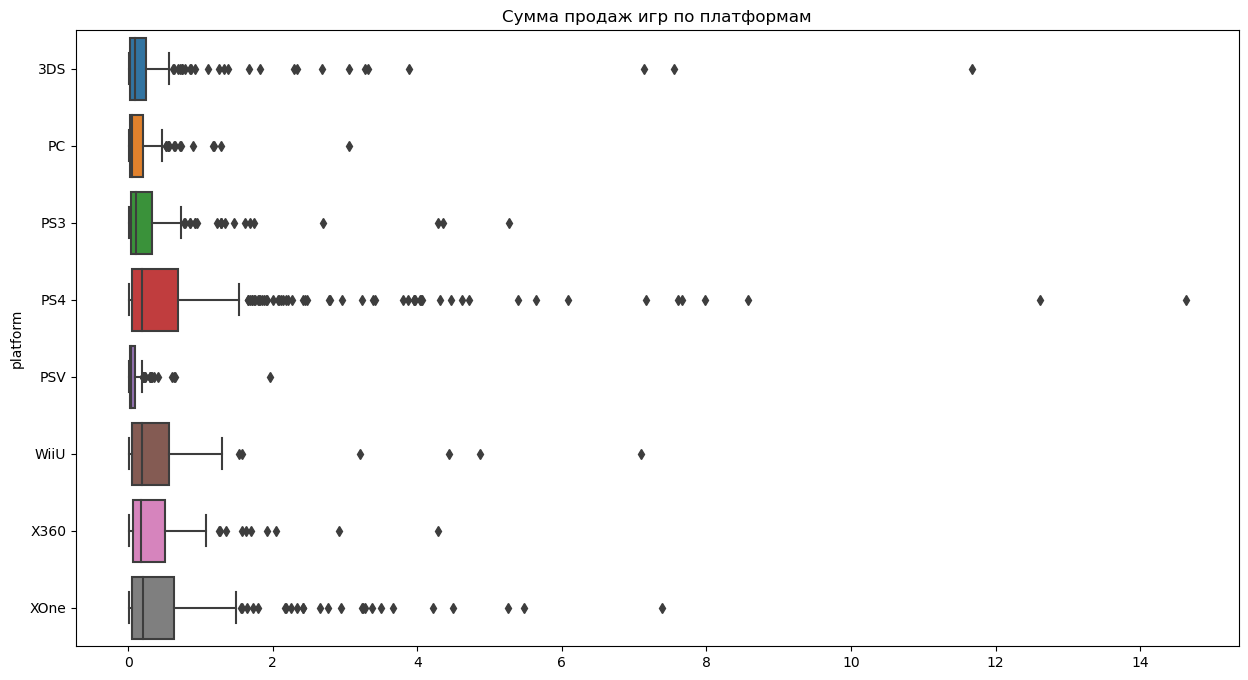

In [26]:
game_sales = (data_actual[['name', 'platform', 'total_sales']]
                 .pivot_table(index='name', 
                              columns='platform',
                              values='total_sales',
                              aggfunc='sum'))
plt.figure(figsize=(15, 8))
plt.title('Сумма продаж игр по платформам')
sns.boxplot(data=game_sales, orient='h')

Оценить ситуацию нам мешают очень большие значения, так называемые выбросы. Урежем ось Х до 1.7

(0.0, 1.7)

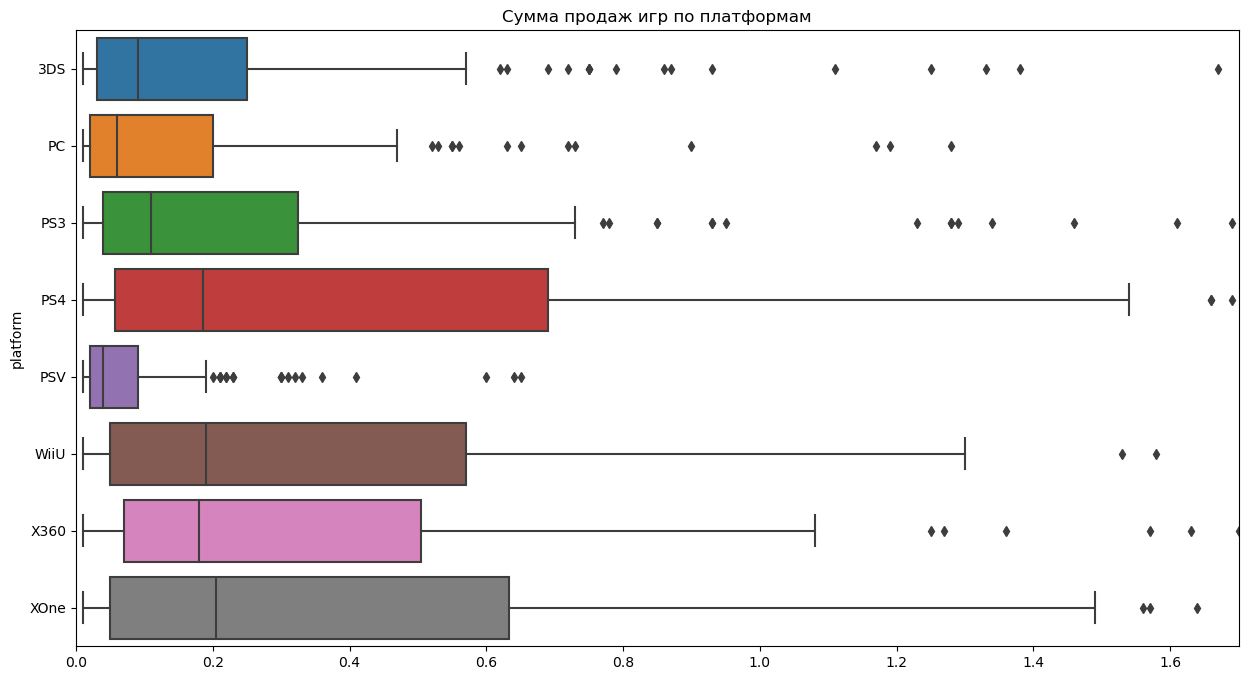

In [27]:
plt.figure(figsize=(15, 8))
plt.title('Сумма продаж игр по платформам')
sns.boxplot(data=game_sales, orient='h')
plt.xlim([0, 1.7])

* **3DS** в среднем сумма продаж по каждой игре была в 2 раза меньше чем у остальных платформ. 
* **PS4** и **XOne** по сумме общих продаж приблизительно одинаковы.
* **PC** имеет низкие показатели продаж, из всех платформ эта - нименее выгодная.
* Исходя из тепловой карты, **WiiU** на закате своих продаж.
* **X360** и **PS3** до сих пор хорошо продаются. Можно сделать вывод что на рынке на этот момент два лидера: Playstation и XBox.
* **PSV** только появилась, мы уже выяснили что линейка Playstation за свою историю имела наибольший успех, поэтому можно ожидать от PSV того же.

### Взаимосвязь оценок и продаж

Вероятно, что оценки могут повлиять на продажи игр. у нас есть оценки обычным пользователей и оценки эекспертов. Мы рассмотрим взаимосвязь между продажами игр и оценками. Заодно можно проверить, как на продажи разных платформ влияют оценки.

Сперва рассмотрим влияние оценок пользователей.

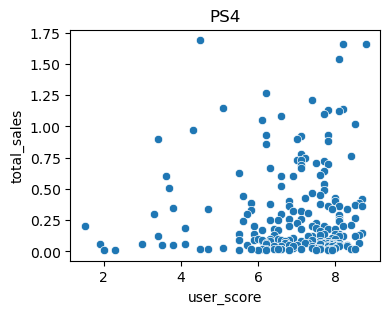

Корреляция продаж с оценками пользователей - 0.056


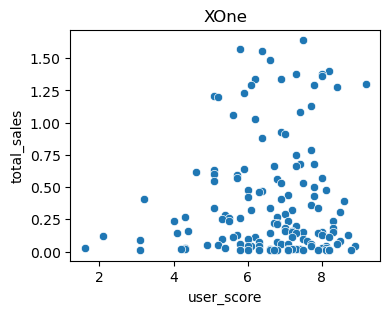

Корреляция продаж с оценками пользователей - 0.081


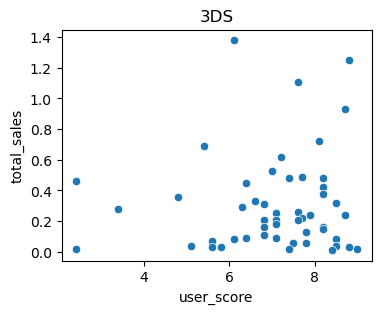

Корреляция продаж с оценками пользователей - 0.075


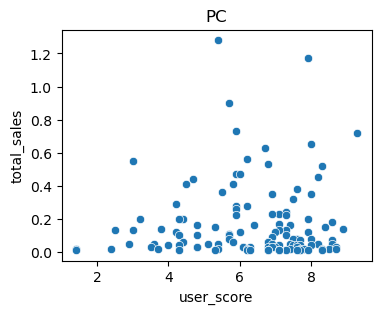

Корреляция продаж с оценками пользователей - 0.038


In [28]:
platforms = ['PS4', 'XOne', '3DS', 'PC']
for platform_name in platforms:
    total_sales = data_actual.query('platform == @platform_name and user_score != -1 and total_sales < 1.7')['total_sales']
    user_scores = data_actual.query('platform == @platform_name')['user_score']
    
    plt.figure(figsize=(4,3))
    plt.title(label=platform_name)
    sns.scatterplot(x=user_scores, y=total_sales)
    plt.show()
    print(f'Корреляция продаж с оценками пользователей - {total_sales.corr(user_scores).round(3)}')

Статистика говорит, что линейная зависимость почти полностью отсутствует. Действительно, на графиках можно увидеть, что точки расположены скорее хаотично, чем линейно показывали бы рост.

Теперь рассмотрим влияние оценок критиков:

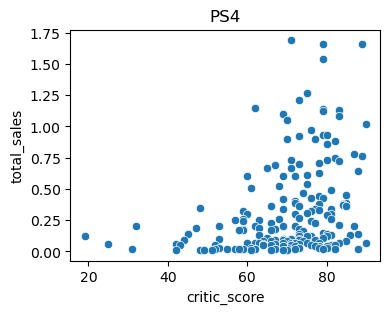

Корреляция продаж с оценками критиков - 0.322


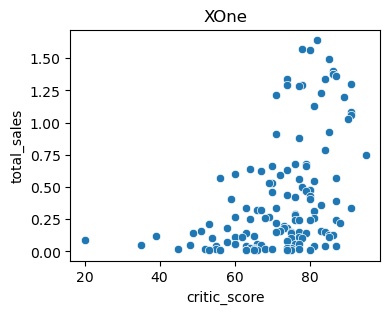

Корреляция продаж с оценками критиков - 0.447


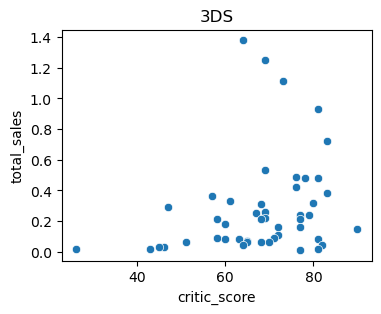

Корреляция продаж с оценками критиков - 0.242


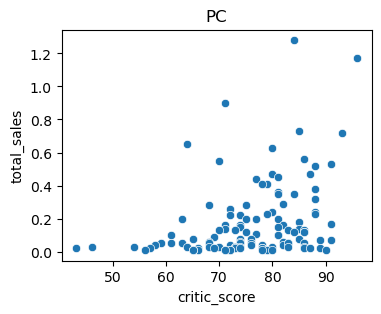

Корреляция продаж с оценками критиков - 0.335


In [29]:
for platform_name in platforms:
    total_sales = data_actual.query('platform == @platform_name and total_sales < 1.7')['total_sales']
    critic_scores = data_actual.query('platform == @platform_name')['critic_score']
    
    plt.figure(figsize=(4,3))
    plt.title(label=platform_name)
    sns.scatterplot(x=critic_scores, y=total_sales)
    plt.show()
    print(f'Корреляция продаж с оценками критиков - {total_sales.corr(critic_scores).round(3)}')

В данном случае ситуация гораздо интереснее, и визуально, и математически. Можно не обращать внимания на оценку пользователей, их отзывы никак не влияют на продажи. Однако стоит прислушиваться к мнению критиков, лучше продавать игры с более высоками оценками экспертов.

### Анализ жанров игр

Разные жанры скорее всего будут продаваться по разному. Сперва мы проверим, какие жанры наиболее популярны в актуальное время. Для этого, как и раньше мы сгруппируем таблицу и используем функцию подсчета значений, отсортируем по убыванию для лучшей наглядности.

<AxesSubplot:title={'center':'Количество продаж'}, xlabel='count', ylabel='genre'>

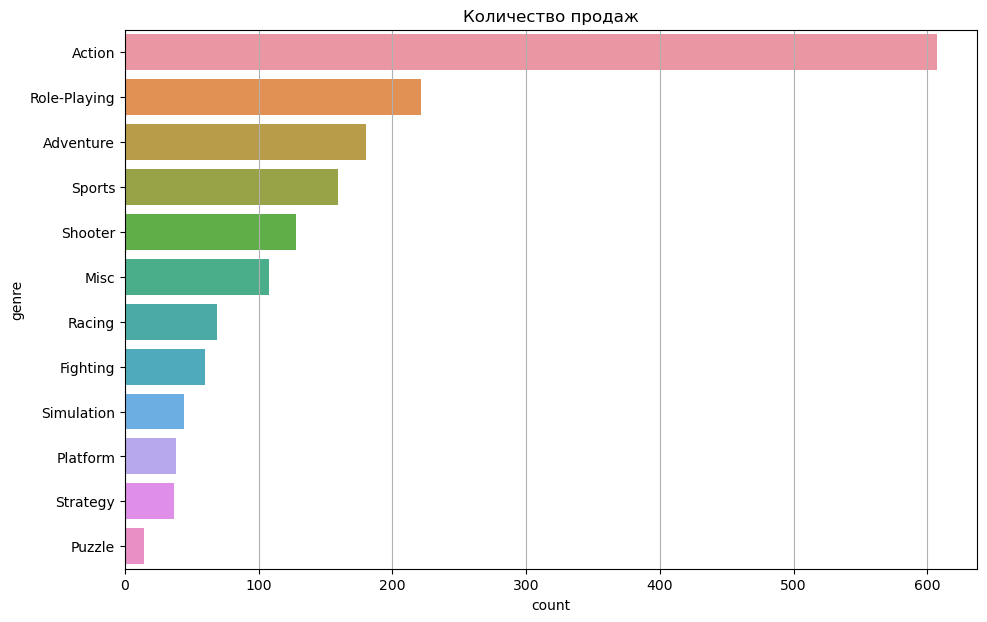

In [30]:
plt.figure(figsize=(11,7))
plt.grid()
plt.title(label='Количество продаж')
sns.barplot(data = (data_actual.groupby('genre').count().reset_index().
                         rename(columns={'name': 'count'}).
                         sort_values(by='count', ascending=False)),
            x='count',
            y='genre')

Впереди всех сегодня - Экшн. Количество игр почти в 3 раза больше чем у второго по популярности - Ролевые игры. В контранст, к этому - Паззлы, Стратегии, Платформеры, Симуляторы. Они имеют низкие показатели количества продаж.

Однако одно дело сравнивать количество продаж, а другое - сумму продаж. Построим соответствующие графики.

(0.0, 3.5)

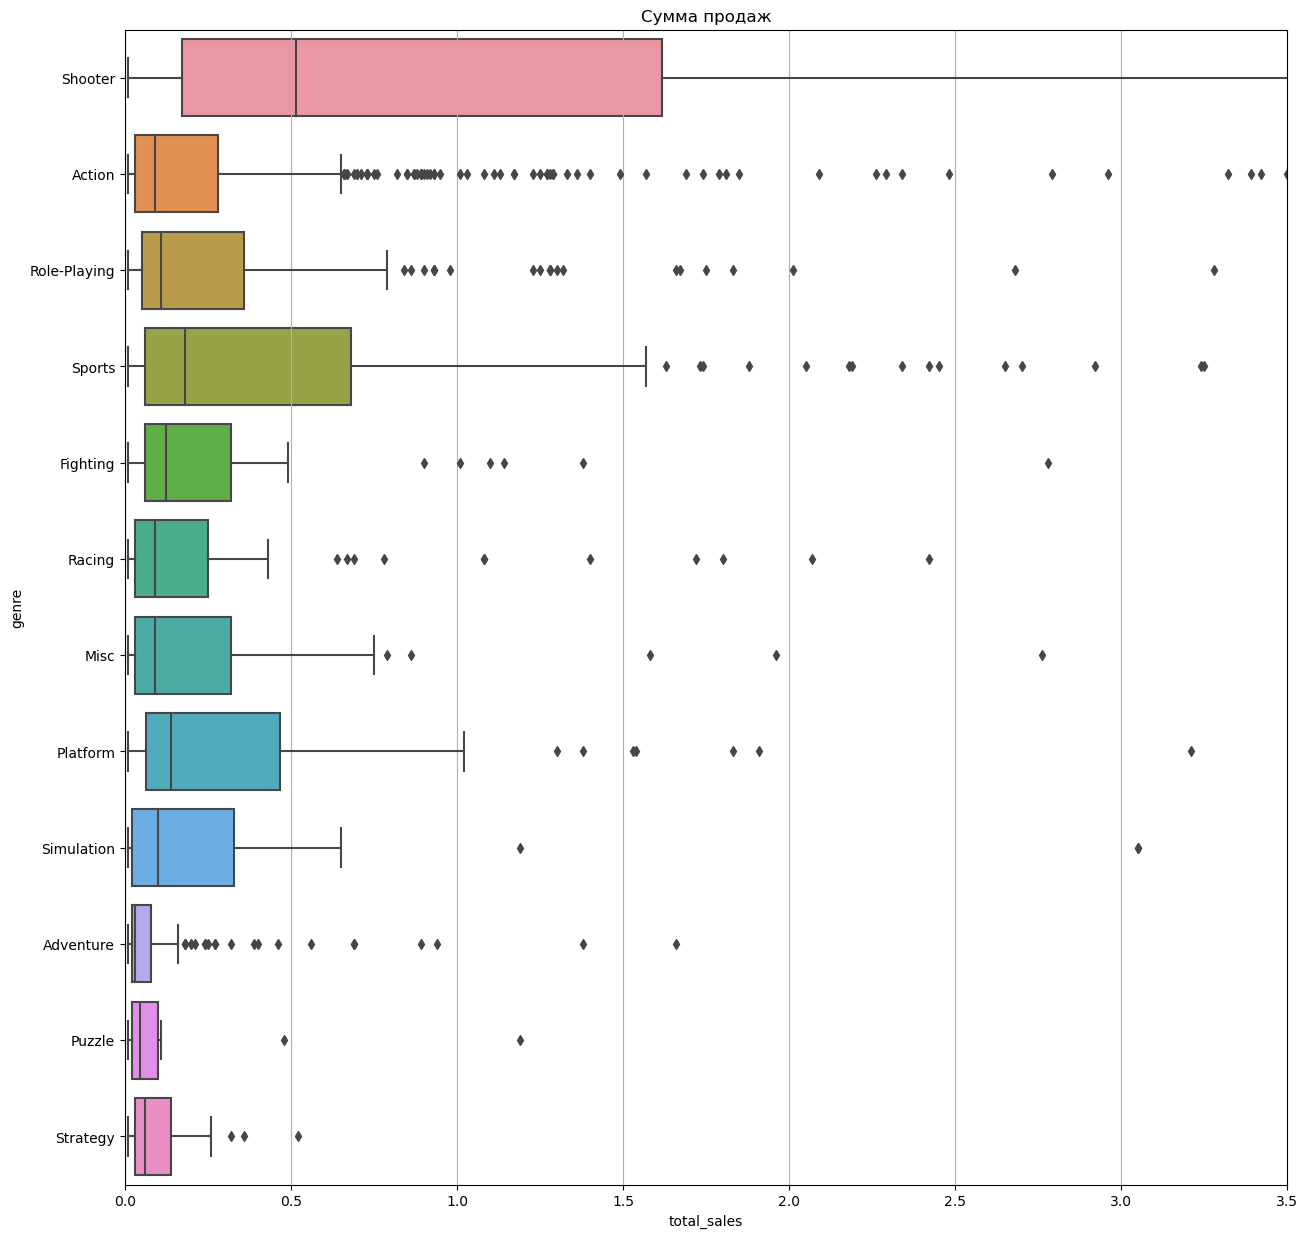

In [31]:
plt.figure(figsize=(15,15))
plt.grid()
plt.title('Сумма продаж')
sns.boxplot(data=data_actual, x='total_sales', y='genre')
plt.xlim([0, 3.5])

Несмотря на то, что Экшн абсолютный лидер по популярности, по продажам он совсем не лучше большинства других жанров. Однако Шутеры приносят гораздо больше прибыли чем любой другой. Еще один жанр, который стоит отметить как очень прибыльный - Спорт.

В то же время такие жанры как Приключения, Паззлы, Стратегии продаются очень слабо.

Резюмируя все графики можно выделить как очень выгодные жанры, так и провальные. Топ составлен от наиболее яркого в списке.

К прибыльным и популярным можно отнести:
1. Шутер
2. Экшн
3. Спорт
4. Ролевые

Жанры, которые продавать сегодня не стоит:
1. Паззлы
2. Стратегии
3. Приключения

## Исследование регионов

Мы определили самые выгодные платформы и жанры. Осталось определиться с регионом продажи, потому что правила в разных участках Земли могут работать по своему.

### Популярность платформ

Выбор платформы может не ограничиться лишь одним вариантом. Может случиться так что в Азии не примут, например Playstation. Узнаем, какие платформы популярны в Европе, Америке и Японии.

**Европа**

Text(1.0, 1.0, 'Топ 5 платформ в Европе')

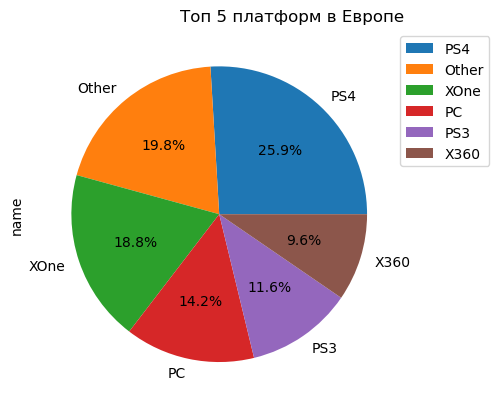

In [32]:
eu_top_platform = (data_actual.query('eu_sales > 0')                    #тадлица сгруппирована по платформам
                   .groupby('platform').count()                         #и показывает встречаемость каждой платформы
                   .sort_values(by='name', ascending=False)
                   .reset_index())
eu_top_platform['platform'] = ([eu_top_platform.loc[index, 'platform'] if index <= 4 #перезапись столбца с платформами, для выделения топа 5
                                else 'Other'                                         #и объеденения остальных платформ в группу "другие"
                                for index in range(len(eu_top_platform))])
eu_top_platform = (eu_top_platform.groupby('platform').sum()     #повторная группировка по уже измененному столбцу платформ
                   .sort_values(by='name', ascending=False)
                   .reset_index())

eu_top_platform_labels = eu_top_platform['platform']
eu_top_platform_pie = eu_top_platform.plot(kind='pie', y='name',labels=eu_top_platform_labels, autopct='%.1f%%')

plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title('Топ 5 платформ в Европе', loc='right')

**Северная Америка**

Text(1.0, 1.0, 'Топ 5 платформ в Северной Америке')

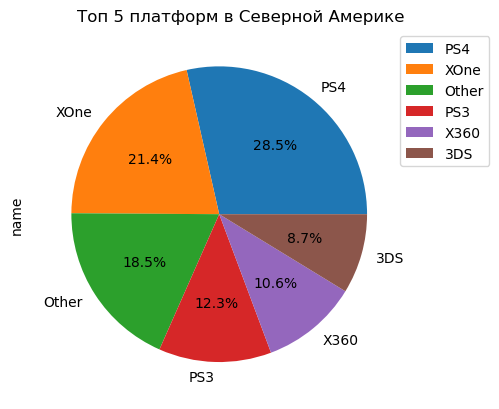

In [33]:
na_top_platform = (data_actual.query('na_sales > 0')              
                   .groupby('platform').count()                   
                   .sort_values(by='name', ascending=False)
                   .reset_index())
na_top_platform['platform'] = ([na_top_platform.loc[index, 'platform'] if index <= 4
                                else 'Other'                                       
                                for index in range(len(na_top_platform))])
na_top_platform = (na_top_platform.groupby('platform').sum()
                   .sort_values(by='name', ascending=False)
                   .reset_index())

na_top_platform_labels = na_top_platform['platform']
na_top_platform.plot(kind='pie', y='name', labels=na_top_platform_labels, autopct='%.1f%%')

plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title('Топ 5 платформ в Северной Америке', loc='right')

**Япония**

Text(1.0, 1.0, 'Топ 5 платформ в Японии')

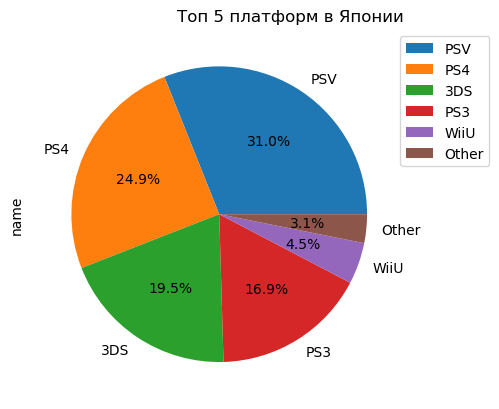

In [34]:
jp_top_platform = (data_actual.query('jp_sales > 0')              
                   .groupby('platform').count()                   
                   .sort_values(by='name', ascending=False)
                   .reset_index())
jp_top_platform['platform'] = ([jp_top_platform.loc[index, 'platform'] if index <= 4
                                else 'Other'                                       
                                for index in range(len(jp_top_platform))])
jp_top_platform = (jp_top_platform.groupby('platform').sum()
                   .sort_values(by='name', ascending=False)
                   .reset_index())

jp_top_platform_labels = jp_top_platform['platform']
jp_top_platform.plot(kind='pie', y='name', labels=jp_top_platform_labels, autopct='%.1f%%')

plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title('Топ 5 платформ в Японии', loc='right')

**Выводы**

Как и ожидалось результаты Америки и Европы очень похожи - они выбирают PS4 и XOne. В Европе PC любят больше. В остальном все очень похоже.<br>
В Японии XBox не востребован, но очень жалуют Playstation, несмотря на то что PS5 только вышла, в Японии она уже активно используется.

### Популярность жанров

Аналогично прошлому пункту, проверим популярность жанров в разных регионах.

**Европа**

Text(1.0, 1.0, 'Топ 5 жанров в Европе')

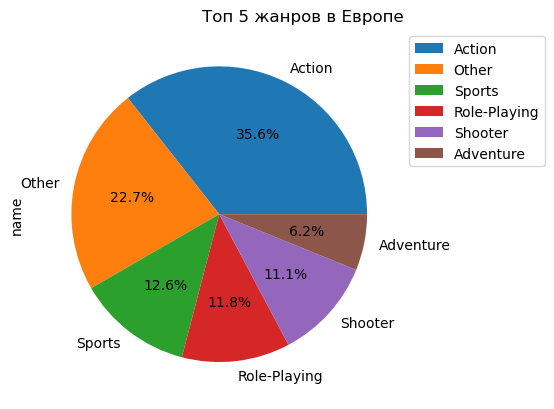

In [35]:
eu_top_genre = (data_actual.query('eu_sales > 0')              
                   .groupby('genre').count()                   
                   .sort_values(by='name', ascending=False)
                   .reset_index())
eu_top_genre['genre'] = ([eu_top_genre.loc[index, 'genre'] if index <= 4
                                else 'Other'                                       
                                for index in range(len(eu_top_genre))])
eu_top_genre = (eu_top_genre.groupby('genre').sum()
                   .sort_values(by='name', ascending=False)
                   .reset_index())

eu_top_genre_labels = eu_top_genre['genre']
eu_top_genre.plot(kind='pie', y='name',labels=eu_top_genre_labels, autopct='%.1f%%')

plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.title('Топ 5 жанров в Европе', loc='right')

**Северная Америка**

Text(1.0, 1.0, 'Топ 5 жанров в Северной Америке')

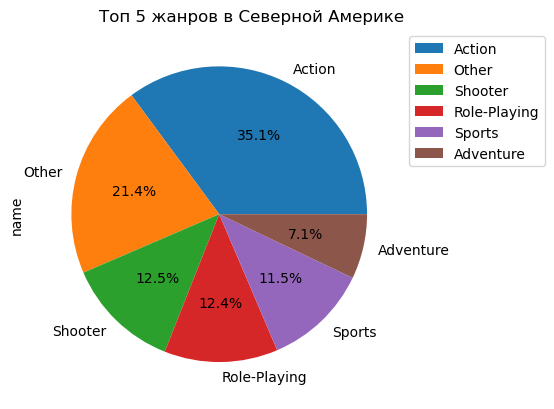

In [36]:
na_top_genre = (data_actual.query('na_sales > 0')              
                   .groupby('genre').count()                   
                   .sort_values(by='name', ascending=False)
                   .reset_index())
na_top_genre['genre'] = ([na_top_genre.loc[index, 'genre'] if index <= 4
                                else 'Other'                                       
                                for index in range(len(na_top_genre))])
na_top_genre = (na_top_genre.groupby('genre').sum()
                   .sort_values(by='name', ascending=False)
                   .reset_index())

na_top_genre_labels = na_top_genre['genre']
na_top_genre.plot(kind='pie', y='name', labels=na_top_genre_labels, autopct='%.1f%%')

plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.title('Топ 5 жанров в Северной Америке', loc='right')

**Япония**

Text(1.0, 1.0, 'Топ 5 жанров в Японии')

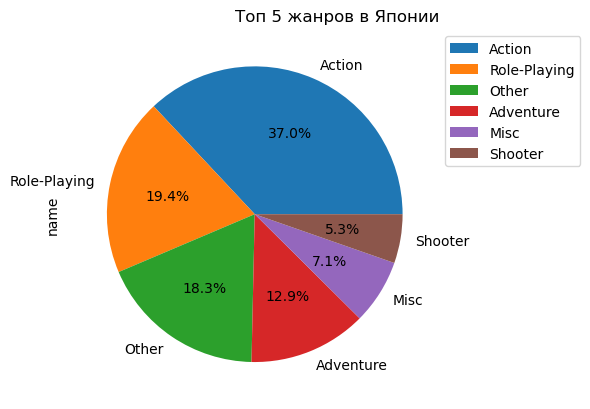

In [37]:
jp_top_genre = (data_actual.query('jp_sales > 0')              
                   .groupby('genre').count()                   
                   .sort_values(by='name', ascending=False)
                   .reset_index())
jp_top_genre['genre'] = ([jp_top_genre.loc[index, 'genre'] if index <= 4
                                else 'Other'                                       
                                for index in range(len(jp_top_genre))])
jp_top_genre = (jp_top_genre.groupby('genre').sum()
                   .sort_values(by='name', ascending=False)
                   .reset_index())

jp_top_genre_labels = jp_top_genre['genre']
jp_top_genre.plot(kind='pie', y='name', labels=jp_top_genre_labels, autopct='%.1f%%')

plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.title('Топ 5 жанров в Японии', loc='right')

И снова, Европа и Северная Америка почти идентичны. В отличие от них, в Японии очень любят ролевые игры и меньше - гонки и спорт.

<b>Выводы</b>

Во всех регионах больше всего продаются игры в жанре <b>экшен</b> с большим отрывом от остальных жанров. Америка и Европа почти идентичны по своим вкусам - спорт, ролевые, шутеры, приключения; В Америке так же любят шутеры, как в Европе спорт, и наоборот.
<p>В Японии гораздо лучше продаются ролевые и приключения, также добавился новый жанр - разносторонний.</p>

### Влияние возрастного рейтинга на продажи

Проверим как влияет рейтинг ESRB на продажи в каждом из регионов. Приведем все графики к одному масштабу.

#### Европа

<AxesSubplot:title={'center':'Средняя сумма продаж по возрастному рейтингу в Европе'}, xlabel='rating', ylabel='eu_sales'>

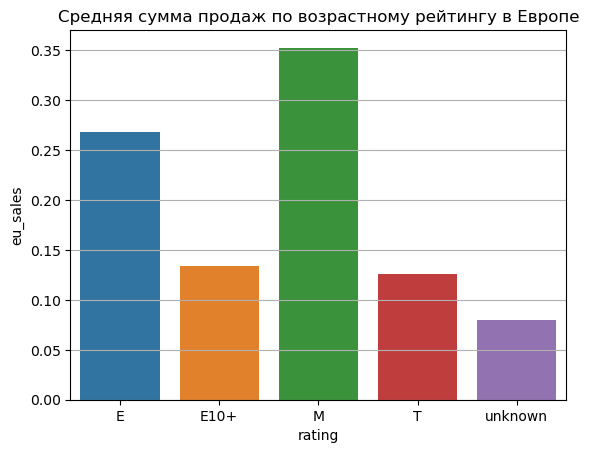

In [95]:
plt.grid(True)
plt.title('Средняя сумма продаж по возрастному рейтингу в Европе')
sns.barplot(data = data_actual[['rating', 'eu_sales']].groupby('rating').mean().reset_index(),
           x='rating', y='eu_sales')

#### Северная Америка

<AxesSubplot:title={'center':'Средняя сумма продаж по возрастному рейтингу в С.Америке'}, xlabel='rating', ylabel='na_sales'>

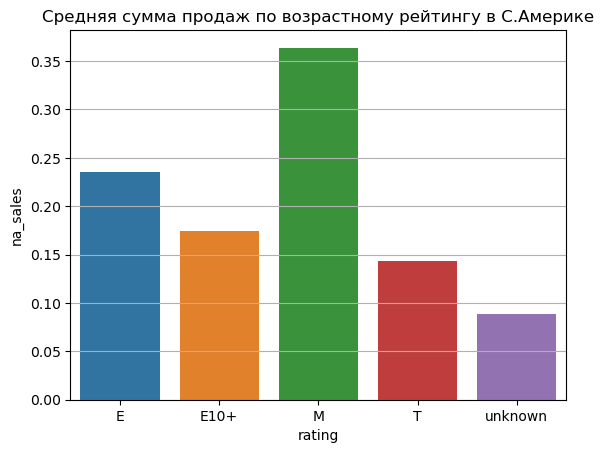

In [96]:
plt.grid(True)
plt.title('Средняя сумма продаж по возрастному рейтингу в С.Америке')
sns.barplot(data = data_actual[['rating', 'na_sales']].groupby('rating').mean().reset_index(),
           x='rating', y='na_sales')

#### Япония

<AxesSubplot:title={'center':'Средняя сумма продаж по возрастному рейтингу в Японии'}, xlabel='rating', ylabel='jp_sales'>

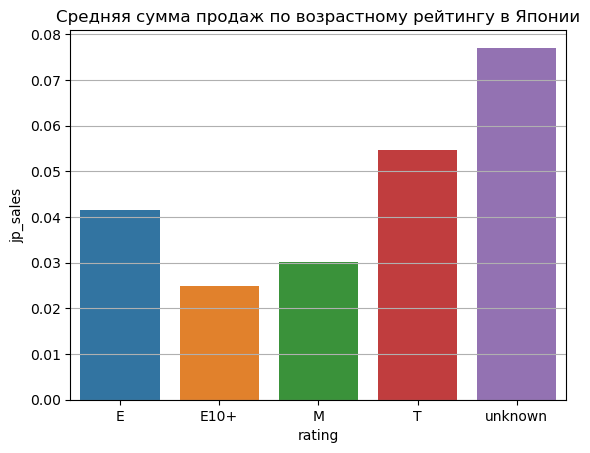

In [97]:
plt.grid(True)
plt.title('Средняя сумма продаж по возрастному рейтингу в Японии')
sns.barplot(data = data_actual[['rating', 'jp_sales']].groupby('rating').mean().reset_index(),
           x='rating', y='jp_sales')

В Японии рейтинг ESRB не используется, поэтому график выглядит сомнительно.
В остальном можно сказать, что игры с рейтингом M (для взрослых продаются лучше), а после него идет рейтинг E (для всех)

## Проверка гипотез

### XBox One и PC

Импортируем библиотеку Numpy для работы со статистикой.

In [41]:
import numpy

Перед проверкой этой гипотезы нам понадобится сводная таблица с платформами, играми и рейтингами пользователей.

In [98]:
game_scores = (data_actual[['name', 'platform', 'user_score']]
               .query('user_score != -1')       #учли обработку пропусков -1
              .pivot_table(index='name', columns='platform', values='user_score'))
game_scores.head()

platform,3DS,PC,PS3,PS4,PSV,WiiU,X360,XOne
name,,,,,,,,
2014 FIFA World Cup Brazil,NaN,NaN,4.3,NaN,NaN,NaN,4.4,NaN
7 Days to Die,NaN,NaN,NaN,5.9,NaN,NaN,NaN,5.2
7th Dragon III Code: VFD,8.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Act of Aggression,NaN,7.1,NaN,NaN,NaN,NaN,NaN,NaN
Adventure Time: The Secret of the Nameless Kingdom,5.6,NaN,NaN,NaN,NaN,NaN,7.5,NaN


Первая гипотеза звучит так: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

Нулевая гипотеза: "Средние пользовательские рейтинги платформ XBox One и PC одинаковые"<br>
Альтернативная гипотеза: "Средние пользовательские рейтинги платформ XBox One и PC разные"

Статистическая значимость - 0.05

Будем использовать t-test и сравнивать две генеральные совокупности.

Узнаем дисперсии двух совокупностей для правильной установки параметра <i>equal_var</i>:

In [99]:
print('Дисперсия пользовательских оценок XBox One -', numpy.var(game_scores['XOne']))
print('Дисперсия пользовательских оценок PC -', numpy.var(game_scores['PC']))

Дисперсия пользовательских оценок XBox One - 1.8795460055096413
Дисперсия пользовательских оценок PC - 2.877374361730718


Дисперсии разные - <i>equal_var = False</i>

In [100]:
import scipy.stats as stats

samp1 = game_scores[game_scores['XOne'].isna() == False]['XOne']
samp2 = game_scores[game_scores['PC'].isna() == False]['PC']

alpha = .05

result = stats.ttest_ind(samp1, samp2, equal_var=False)
print('p-значение -', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

print()
print('Средняя пользовательская оценка XOne -', samp1.mean())
print('Средняя пользовательская оценка PC -', samp2.mean())

p-значение - 0.11601398086669047
Не получилось отвергнуть нулевую гипотезу

Средняя пользовательская оценка XOne - 6.594545454545453
Средняя пользовательская оценка PC - 6.298360655737701


Р-значение говорит о том, что вероятность получить равные средние пользовательские оценки случайно равна 11%. Нулевую гипотезу отвергнуть не удалось - скорее всего различий нет.

### Action и Sports

Перед проверкой этой гипотезы нам понадобится сводная таблица с жанрами, играми и рейтингами пользователей.

In [45]:
genre_scores = (data_actual[['name', 'genre', 'user_score']]
                .query('user_score != -1')
              .pivot_table(index='name', columns='genre', values='user_score'))
genre_scores

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
name,,,,,,,,,,,,
2014 FIFA World Cup Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.35,NaN
7 Days to Die,5.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7th Dragon III Code: VFD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.2,NaN,NaN,NaN,NaN
Act of Aggression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1
Adventure Time: The Secret of the Nameless Kingdom,6.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Yoshi's Woolly World,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zero Escape: Zero Time Dilemma,NaN,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zombie Army Trilogy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN


Гипотеза звучит так: "Средние пользовательские рейтинги жанров Action и Sports разные"

Нулевая гипотеза: "Средние пользовательские рейтинги одинаковые"<br>
Альтернативная гипотеза: "Средние пользовательские рейтинги разные"

Статистическая значимость - 0.05

Используем тот же тест, все аналогично. Проверяем дисперсии

In [46]:
print('Дисперсия пользовательских оценок Action -', numpy.var(genre_scores['Action']))
print('Дисперсия пользовательских оценок Sport -', numpy.var(genre_scores['Sports']))

Дисперсия пользовательских оценок Action - 1.8646449813906336
Дисперсия пользовательских оценок Sport - 2.2225739715013577


<i>equal_var = False</i>

In [47]:
samp1 = genre_scores[genre_scores['Action'].isna() == False]['Action']
samp2 = genre_scores[genre_scores['Sports'].isna() == False]['Sports']

alpha = .05

result = stats.ttest_ind(samp1, samp2, equal_var=False)
print('p-значение -', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Средняя пользовательская оценка Action -', samp1.mean())
print('Средняя пользовательская оценка Sports -', samp2.mean())

p-значение - 4.07189614332293e-07
Отвергаем нулевую гипотезу
Средняя пользовательская оценка Action - 6.823535714285712
Средняя пользовательская оценка Sports - 5.400280423280423


Р-значение слишком малое, это говорит о том, что скорее всего пользовательские оценки будут отличаться.

## Общий вывод

**Платформы**<br>
Примерно каждые 6 лет появляются новые платформы, которые почти сразу затмевают старые. Это ярко прослеживается по <b>Nintendo</b>, <b>Playstation</b> и <b>XBox</b>. Это три самые <b>потенциально прибыльные</b> платформы.

Это в свою очередь означает, что для прогноза следует брать данные с 2014 года. По этим данным можно составить прогноз на 2017, 2018 и 2019 года, так как за 6 лет появляются новые платформы. Это будет наш <b>актуальный период</b>.

* **3DS** в среднем сумма продаж по каждой игре была в 2 раза меньше чем у остальных платформ. 
* **PS4** и **XOne** по сумме общих продаж приблизительно одинаковы.
* **PC** имеет низкие показатели продаж, из всех платформ эта - наименее выгодная.
* Исходя из тепловой карты, **WiiU** на закате своих продаж.
* **X360** и **PS3** до сих пор хорошо продаются. Можно сделать вывод что на рынке на этот момент два лидера: Playstation и XBox.
* **PSV** только появилась, мы уже выяснили что линейка Playstation за свою историю имела наибольший успех, поэтому можно ожидать от PSV того же.

**Влияние оценок**<br>
Мы искали возожность влияния оценок критиков и пользователей на продажи игр и выяснили:
<ul>
    <li>Оценки пользователей совершенно не влияют на продажи</li>
    <li>К оценкам экспертов стоит прислушаться</li>
</ul>

**Жанры**<br>
Впереди всех сегодня - Экшн. Количество игр почти в 3 раза больше чем у второго по популярности - Ролевые игры.
В контранст, к этому - Паззлы, Стратегии, Платформеры, Симуляторы. Они имеют низкие показатели количества продаж.

Несмотря на то, что Экшн абсолютный лидер по популярности, по продажам он совсем не лучше большинства других жанров. Однако Шутеры приносят гораздо больше прибыли чем любой другой. Еще один жанр, который стоит отметить как очень прибыльный - Спорт.
В то же время такие жанры как Приключения, Паззлы, Стратегии продаются очень слабо.

Топ прибыльных жанров:
  1. Шутер
  2. Экшн
  3. Спорт
  4. Ролевые
  
Жанры, которые продавать сегодня не стоит:
  1. Паззлы
  2. Стратегии
  3. Приключения

У разных регионов разные вкусы насчет жанров и платформ. То что работает в Северной Америке и Европе, может не сработать в Японии.

<b>Европа</b> предпочитает PS4, XOne, PC, PS3, X360 в платформах;
а также экшен, спорт, ролевые, шутеры, приключения в жанрах.

<b>Северная Америка</b> предпочитает PS4, XOne, PS3, X360, 3DS в платформах;
а также экшен, шутер, ролевые, спорт, приключения в жанрах.

<b>Япония</b> предпочитает PS5, PS4, 3DS, PS3 в платформах;
а также экшен, ролевые, приключения, смешанные, шутеры в жанрах.

**Рейтинг ESRB**<br>
Игры с меткой "M" (для взрослых) продаются лучше всего. Игры с меткой E (для всех возрастов) продаются лучше T (подростки), а наименее успешными в продажах являются игры с метко "E10+" (для детей).<br>
В Японии этот рейтинг не используется.

**Проверка гипотез**
По результатам статистических тестов мы выяснили:
<ul>
    <li>Средние пользовательские рейтинги платформ XBox One и PC скорее всего равны.
    <li>Средние пользовательские рейтинги жанров Action и Sports с большей вероятностью будут отличаться.
</ul>
